#Assignments for Notebook 5
---



#Excercise 5.1 Prediction of density
The objective of this exercise is to generate a prediction of red wine density using multiple linear regression and Ridge regression. The Ridge regression is a regularized linear regression. This method uses a cost function with a constant alpha that defines the penalization.

$
Ridge\;Regression_{CostFunction}=\sum_{i=1}^M (y_i-\hat{y_i})^2=\sum_{i=1}^M (y_i-\sum_{j=0}^p w_j \times x_{ij})^2 + \alpha\sum_{j=0}^p w_j^2 \\
For \; some \; c \, > \, 0, \, \sum_{j=0}^p w_j^2<c
$

**Scikit learn** has implemented Ridge Regression in the function **sklearn.linear_model.Ridge**. For more information, please visit the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html 'sklearn.linear_model.Ridge').

The steps to follow are:

- Divide the data into training and test sets.
- Standardize the training and testing sets.
- Make a multiple linear regression for predicting the density.
- Determine the $R^2$ and $RSME$ from MLR.
- Determine the coefficients from MLR.
- Make different Ridge Regression varying the alpha for predicting the density.
- Plot $RSME$ vs alpha for MLR and RR.

Dataset URL: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

- Divide the data into training and test sets.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")

In [2]:
from sklearn.model_selection import train_test_split

X = df.drop(['quality', 'density'], axis=1)
y = df['density']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

- Standardize the training and testing sets.

In [3]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

- Make a multiple linear regression for predicting the density.

In [4]:
from sklearn.linear_model import LinearRegression

multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(X = X_train, y = y_train)

LinearRegression()

- Determine the $R^2$ and $RSME$ from MLR.

In [5]:
from sklearn.metrics import r2_score, mean_squared_error

pred_train_lr = multiple_linear_regression.predict(X_train)
pred_test_lr = multiple_linear_regression.predict(X_test)

r2 = r2_score(y_test, pred_test_lr)
print('R2 train = ', r2_score(y_train, pred_train_lr))
print('R2 test = ', r2_score(y_test, pred_test_lr))

rmse = np.sqrt(mean_squared_error(y_test,pred_test_lr ))
print('RSME test = ', rmse)


R2 train =  0.8322370241564485
R2 test =  0.857488099710633
RSME test =  0.0007442712760334175


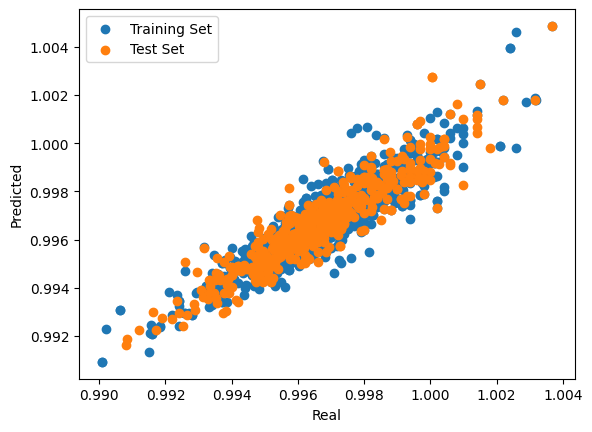

In [6]:
plt.scatter(y_train,pred_train_lr, label='Training Set')
plt.scatter(y_test,pred_test_lr, label='Test Set')

plt.xlabel('Real')
plt.ylabel('Predicted')
plt.legend()

- Determine the coefficients from multiple linear regression (MLR).

In [7]:
coeffecients = pd.DataFrame(multiple_linear_regression.coef_,X.columns.tolist())
coeffecients.columns = ['Coeffecient'] 
print(coeffecients)

                      Coeffecient
fixed acidity            0.001588
volatile acidity         0.000113
citric acid              0.000009
residual sugar           0.000622
chlorides                0.000067
free sulfur dioxide     -0.000112
total sulfur dioxide     0.000085
pH                       0.000778
sulphates                0.000238
alcohol                 -0.000967


<Axes: >

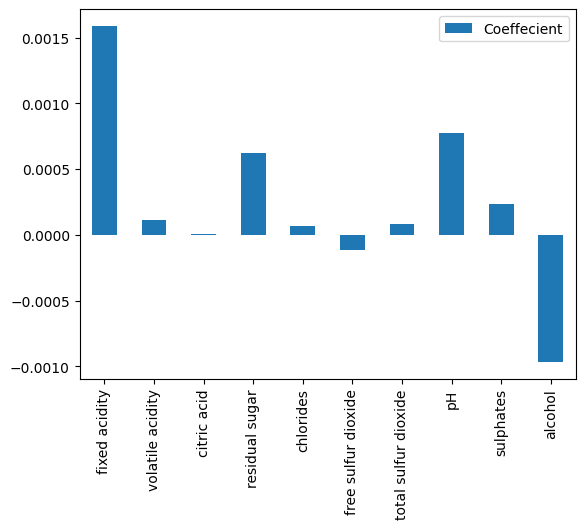

In [8]:
coeffecients.plot.bar()

- Try different Ridge Regression analysis varying the value of _alpha_ for predicting the density and plot $RSME$ vs alpha for MLR and RR.

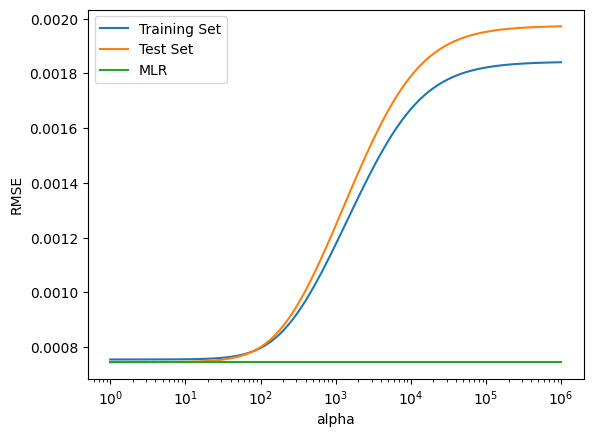

In [9]:
from sklearn.linear_model import Ridge

alphas=np.logspace(0,6,endpoint=True,num=100,base=10)
RMSE=[]
RMSE_p=[]
for x in (alphas):
    #print(x)
    ridge_regression = Ridge(x)
    ridge_regression.fit(X_train, y_train)
    pred_test_ridge= ridge_regression.predict(X_test)
    pred_train_ridge=ridge_regression.predict(X_train)
    RMSE_p.append(np.sqrt(mean_squared_error(y_test,pred_test_ridge)))
    RMSE.append(np.sqrt(mean_squared_error(y_train,pred_train_ridge)))
    
#print(RMSE)

plt.plot(alphas,RMSE, label='Training Set')
plt.plot(alphas,RMSE_p, label='Test Set')
plt.plot(alphas,len(alphas)*[rmse], label='MLR')
plt.xscale("log")
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.legend()

And now, let's we generate an interactive plot in which you can vary the _alpha_ value and it returns a scatterplot of predicted versus actual acidity values and the coefficients for every feature of the Ridge regression.

In [10]:
import ipywidgets as widgets

from IPython.display import display
from sklearn import preprocessing


data_ridge = df.copy()
data_ridge = data_ridge.drop(labels = ['quality','density'],axis = 1)
features = data_ridge.columns.tolist()
data_ridge = preprocessing.StandardScaler().fit_transform(data_ridge)
y_ridge = df['density']

def Lassovis(alpha):
    ridge_regression = Ridge((alpha))
    ridge_regression.fit(X = data_ridge, y = y_ridge)
        
    plt.figure(figsize=(10, 6))
    plt.subplot(211)
    pred_test_ridge=ridge_regression.predict(X_test)
    plt.scatter(y_test,pred_test_ridge)
    plt.xlabel('y_test')
    plt.ylabel('pred_test_ridge')

    plt.subplot(212)
    plt.bar(features,ridge_regression.coef_)
    plt.xticks(rotation=90)


widgets.interact(Lassovis,alpha=widgets.FloatLogSlider(name='Alpha', base=10, min=0, max=6, step=0.5, value=0.001));

interactive(children=(FloatLogSlider(value=1.0, description='alpha', max=6.0, step=0.5), Output()), _dom_class…